##### 6.4 Machine Learning Part

##### This script contains the following:
##### 1. Importing libraries and data
##### 2. Data cleaning
##### 3. Data prep for regression analysis
##### 4. Regression analysis


##### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs  created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
df = pd.read_pickle('/Users/shaqurcasco/Downloads/Cf_Acheivement6/prepared data 6.1/df_clean_6.3.pkl')

##### 2. Data cleaning

In [7]:
df.columns

Index(['Order Date', 'Ship Mode', 'Customer ID', 'Segment', 'Country', 'City',
       'State', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Profit_Range'],
      dtype='object')

In [ ]:
Missing values

In [8]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Order Date      0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
Profit_Range    0
dtype: int64

##### Duplicates check

In [9]:
dups = df.duplicated()

In [10]:
dups.shape # No dups

(2720,)

##### Extreme values checks

/var/folders/9f/n36r4f3s7qsf6wgq534gqhbh0000gn/T/ipykernel_84175/3856716373.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Profit'], bins=25)


<Axes: xlabel='Profit', ylabel='Density'>

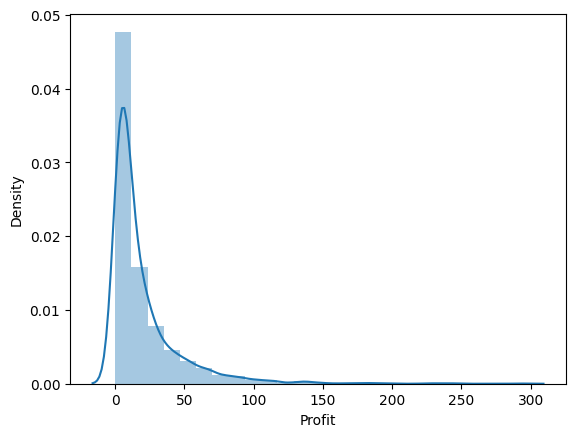

In [11]:
sns.distplot(df['Profit'], bins=25)

In [12]:
 # Check the mean
df['Profit'].mean()

19.60124893382353

In [14]:
# Check the median
df['Profit'].median() 

9.65435

In [15]:
# Check the max
df['Profit'].max() 

292.9872

##### 3. Data prep for regression analysis

##### Hypothesis:
If sales of product is higher then more profit will be generated

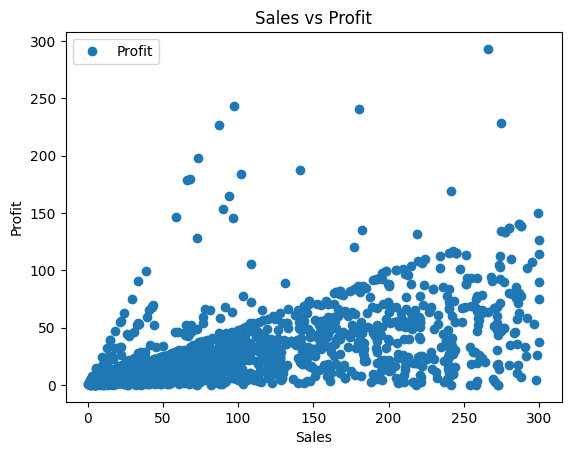

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Sales', y='Profit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Sales vs Profit')  
plt.xlabel('Sales')  
plt.ylabel('Profit')  
plt.show()

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Sales'].values.reshape(-1,1)
y = df['Profit'].values.reshape(-1,1)

In [21]:
X

array([[ 48.896],
       [  3.6  ],
       [141.42 ],
       ...,
       [ 13.904],
       [ 20.72 ],
       [  3.024]])

In [23]:
y

array([[  8.5568],
       [  1.728 ],
       [187.3815],
       ...,
       [  4.5188],
       [  6.475 ],
       [  0.6048]])

In [24]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [30]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

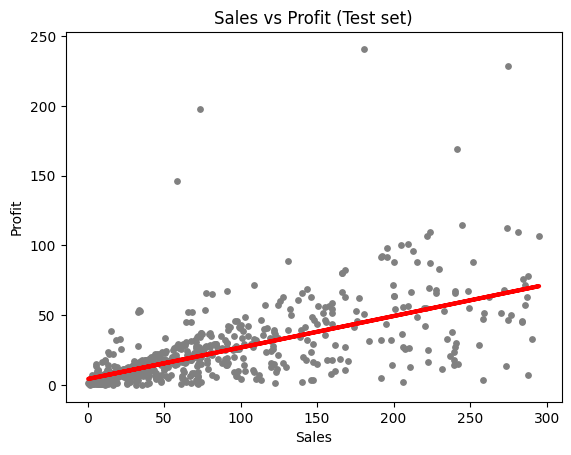

In [32]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Sales vs Profit (Test set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

In [35]:
 # Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [36]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.22573746]]
Mean squared error:  344.539797441219
R2 score:  0.4640368464882566


The slope is positive = 0.23, which indicate positive relationship between the independant variables (sales) and dependant variables (profit).
The root mean squared error (MSE) is large and this shows the regression line isn’t an accurate representation of the data.
an R-squared score of 0.46 suggests that the model explains a moderate portion of the variance in the dependent variable

In [37]:
y_predicted

array([[16.11681203],
       [ 5.96585005],
       [24.87497389],
       [ 9.74379213],
       [ 4.84980406],
       [ 6.60152673],
       [31.50488301],
       [ 7.12523763],
       [11.35104283],
       [10.33612722],
       [42.11815529],
       [ 7.55188142],
       [68.29105903],
       [10.82281718],
       [ 8.42548538],
       [12.10049119],
       [ 5.77532764],
       [ 4.87012043],
       [15.03146633],
       [28.71657393],
       [13.64905014],
       [66.25264979],
       [ 6.95909486],
       [19.08480811],
       [ 6.80920519],
       [ 9.15687475],
       [ 7.8241208 ],
       [ 4.51751853],
       [19.4143848 ],
       [21.00583387],
       [ 6.63222702],
       [19.87850101],
       [17.19674002],
       [14.35786576],
       [ 6.08233058],
       [ 8.45257388],
       [13.51812242],
       [ 9.47290719],
       [58.20510944],
       [ 6.42454856],
       [32.02317621],
       [39.59350757],
       [20.90425202],
       [ 6.13199282],
       [ 5.06109432],
       [20

In [38]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4.6193,16.116812
1,2.9340,5.965850
2,42.1314,24.874974
3,11.5432,9.743792
4,1.4112,4.849804
5,3.8570,6.601527
6,28.2240,31.504883
7,6.2208,7.125238
8,2.7720,11.351043
9,2.0388,10.336127


##### Compare how the regression fits the training set

In [39]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [40]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [41]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.22573746]]
Mean squared error:  429.4677075095489
R2 score:  0.3981834111722641


The slope is positive just like the model and also extreme high MSE and low R2 score compare to the test model, The hypothesis is partial true and there might be other variables contributing to profit other than sales.

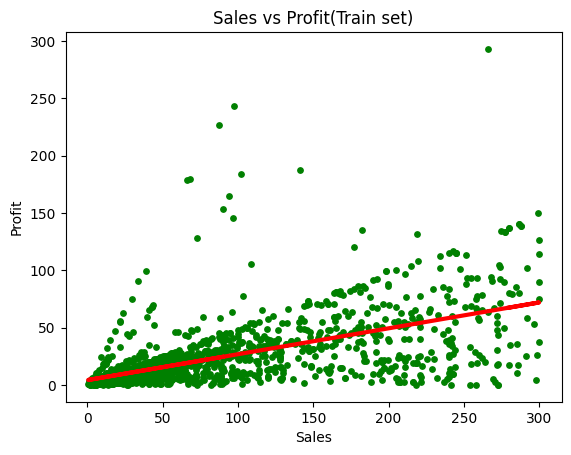

In [42]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Sales vs Profit(Train set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

##### Bonus: performance improvement after removing outliers¶

In [44]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['Sales'] <=200]

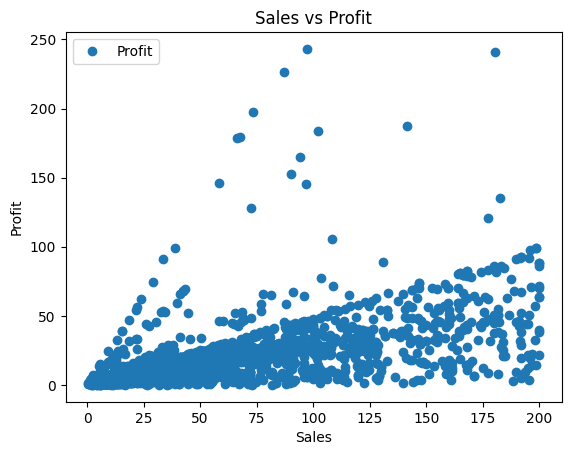

In [45]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Sales', y='Profit',style='o')
plt.title('Sales vs Profit')  
plt.xlabel('Sales')  
plt.ylabel('Profit')
plt.show()

In [46]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_2 = df_test['Sales'].values.reshape(-1,1)
y_2 = df_test['Profit'].values.reshape(-1,1)

In [47]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [48]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [49]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [50]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [51]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.26001253]]
Mean squared error:  271.4776026275908
R2 score:  0.4094759820680671


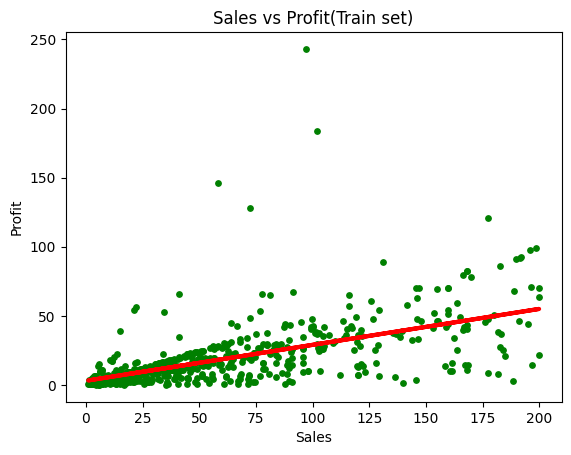

In [52]:
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='green', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Sales vs Profit(Train set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

In [53]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)


,Actual,Predicted
0,9.3312,8.050947
1,7.4000,9.153400
2,4.9815,6.834088
3,27.8820,19.106680
4,7.9200,9.586061
5,17.4690,13.089990
6,22.2000,14.540860
7,4.1328,6.066531
8,3.1104,4.681185
9,3.6018,5.032201
